## Goals for HPCC/RCC: 
1. Run full brain scans through my program
1. Determine significant differences between various regions 
    1. Look at density, cell size, roundness etc. in sections (maybe squares, 10 by 10)
    1. Calculate averages 

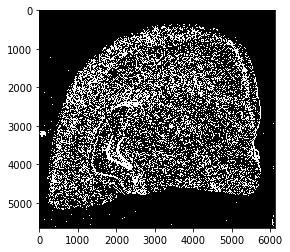

In [13]:
import matplotlib.pyplot as plt

import skimage.io
from skimage.filters import threshold_mean

imname = 'C:/Users/Emily/source/nance_lab/pnnanalysis/brainSectionScans/confocal_20x_scan_19_blue.png'
img = skimage.io.imread(imname)

nucl = img[:, :, 2]

thresh = threshold_mean(nucl)
binary = nucl > thresh

plt.imshow(binary, cmap='gray')
plt.show()